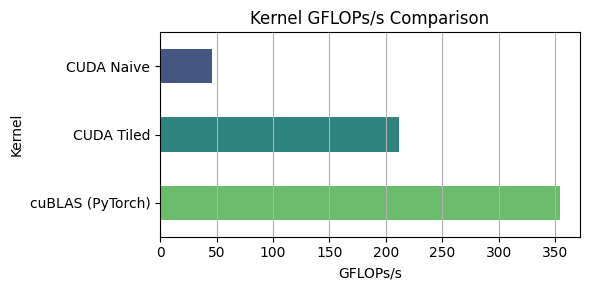

In [8]:
# Re-import necessary libraries after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

# Load the results from the file
file_path = "results.txt"
with open(file_path, "r") as f:
    lines = f.readlines()

# Parse lines into dictionaries
parsed_results = [eval(line.strip()) for line in lines]

# Convert to DataFrame
df = pd.DataFrame(parsed_results)

# Normalize performance relative to cuBLAS
cublas_gflops = df[df['Method'] == 'cuBLAS (PyTorch)']['GFLOPs'].values[0]
df['Performance Relative to cuBLAS (%)'] = (df['GFLOPs'] / cublas_gflops * 100).round(1)

# Sort by performance for visualization
df_sorted = df.sort_values(by='GFLOPs', ascending=True)

# Plotting
plt.figure(figsize=(6, 3))
sns.barplot(x='GFLOPs', y='Method', data=df_sorted, palette='viridis', width=0.5)
plt.title("Kernel GFLOPs/s Comparison")
plt.xlabel("GFLOPs/s")
plt.ylabel("Kernel")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

In [9]:
# Get cuBLAS GFLOPs as baseline
baseline = df[df['Method'].str.contains("cuBLAS")]['GFLOPs'].values[0]

# Add performance relative to cuBLAS
df['Performance vs cuBLAS (%)'] = (df['GFLOPs'] / baseline * 100).round(1)

# Format nicely like a presentation table
styled_df = df[['Method', 'GFLOPs', 'Performance vs cuBLAS (%)']].sort_values(by='GFLOPs', ascending=False)
styled_df.reset_index(drop=True, inplace=True)
styled_df.index += 1  # Start from 1

# Display the styled table
import pandas.io.formats.style
styled_df.style.set_caption("Performance Comparison Table (Relative to cuBLAS)")

,Method,GFLOPs,Performance vs cuBLAS (%)
1,cuBLAS (PyTorch),354.110860,100.000000
2,CUDA Tiled,211.519025,59.700000
3,CUDA Naive,46.361065,13.100000
